In [1]:
#Need to run the following commands once to install basemap package. Remove comment '#':
#!pip install basemap
#!pip install basemap-data

In [2]:
#import necessary packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

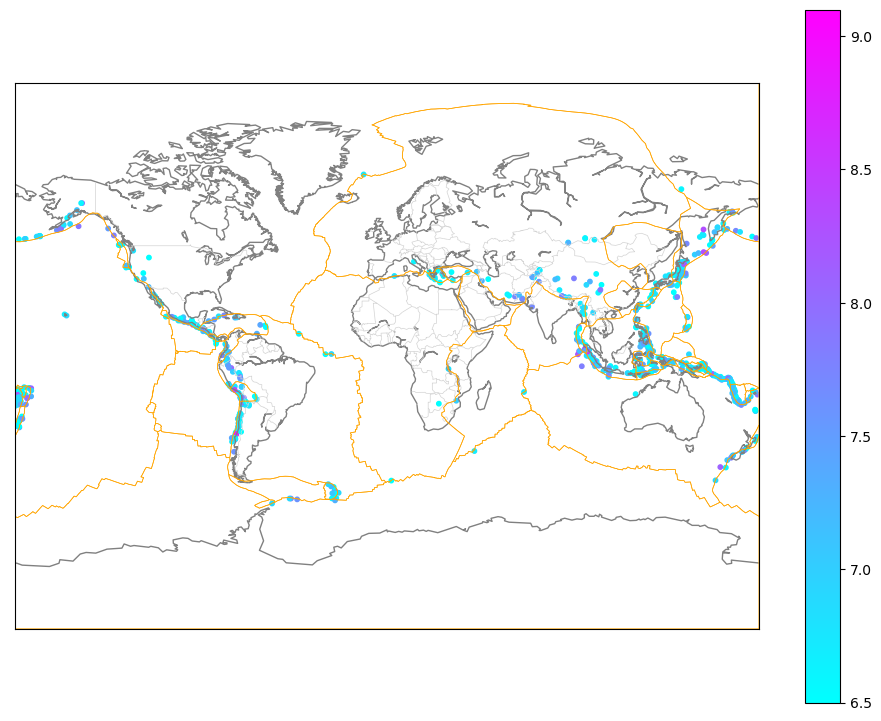

In [3]:
#Need to download all sPB2002_plates files from: https://github.com/fraxen/tectonicplates. 
#Need to download earthquake.csv from: https://www.kaggle.com/datasets/warcoder/earthquake-dataset

#set size of figure
fig = plt.figure(figsize=(12,9))

#Use Matplotlib Basemap function to draw world map in Kavrayskiy VII Projection(mill) format with coastlines and countries
world_map = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
world_map.drawcoastlines(color='grey')
world_map.drawcountries(color='lightgrey')

#change file path below
world_map.readshapefile('F:\Stevens\Masters\EE 695 - Applied Machine Learning\Project\PB2002_plates',
                        name='tectonic_plates', 
                        drawbounds=True, 
                        color='orange')

#Using the pandas package, grab the latitude, longitude, and magnitude data from csv and convert to list
#change file path below for earthquake data
earthquake_data=pd.read_csv(r'F:\Stevens\Masters\EE 695 - Applied Machine Learning\Project\earthquake_data.csv')
lat = earthquake_data['latitude'].tolist()
lon = earthquake_data['longitude'].tolist()
mag = earthquake_data['magnitude'].tolist()

#Plot world map with earthquake location data plotted. Color mapping included to visualize magnitude.
world_map.scatter(lon, lat, latlon = True, s = 10, c = mag, cmap='cool', marker = 'o', alpha = 1)
plt.colorbar()

In [4]:
#Remove outlier data points.

#Russia 1
lat.pop(710)
lon.pop(710)
mag.pop(710)

#Russia 2
lat.pop(708)
lon.pop(708)
mag.pop(708)

#Hawaii 1
lat.pop(618)
lon.pop(618)
mag.pop(618)

#Russia 3
lat.pop(449)
lon.pop(449)
mag.pop(449)

#Russia 4
lat.pop(445)
lon.pop(445)
mag.pop(445)

#Hawaii 2
lat.pop(174)
lon.pop(174)
mag.pop(174)

#Mongolia
lat.pop(81)
lon.pop(81)
mag.pop(81)

6.7

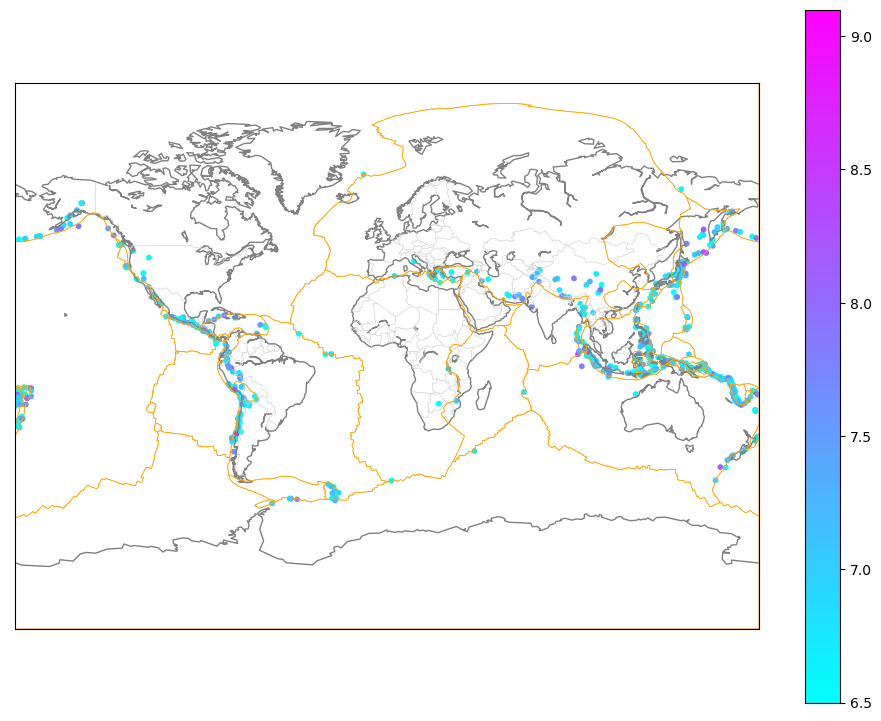

In [5]:
#Previous code to display map used again to display earthquake data with outliers removed

fig = plt.figure(figsize=(12,9))

world_map = Basemap(projection='mill',lon_0=0,resolution='c')
world_map.drawcoastlines(color='grey')
world_map.drawcountries(color='lightgrey')

world_map.readshapefile('F:\Stevens\Masters\EE 695 - Applied Machine Learning\Project\PB2002_plates',
                        name='tectonic_plates', 
                        drawbounds=True, 
                        color='orange')

world_map.scatter(lon, lat, latlon = True, s = 10, c = mag, cmap='cool', marker = 'o', alpha = 1)
plt.colorbar()

In [6]:
#Create shuffled index of data and split data into training dataset and test dataset.

shuffled_indices = np.random.permutation(len(lat)) #created random permuation of indices of pclass (same length as all)
test_set_size = int(len(lat)*0.2) #take 20% size for test set
test_indices = shuffled_indices[:test_set_size] #created test indices
train_indices = shuffled_indices[test_set_size:] #create train indices

In [7]:
#Create training input, training output, testing input, and testing output arrays based on shuffled indices.

train_data_in = []
train_data_out = []
test_data_in = []
test_data_out = []

for i in train_indices:
    train_data_in.append([lat[i],lon[i]])
    train_data_out.append(mag[i])
    
for j in test_indices:
    test_data_in.append([lat[j],lon[j]])
    test_data_out.append(mag[j])

In [8]:
#Fit RandomForestRegressor function from sklearn to fit training data

from sklearn.ensemble import RandomForestRegressor

rand_reg = RandomForestRegressor(max_leaf_nodes=20,n_estimators=10,max_depth=30,max_samples=50)
rand_reg.fit(train_data_in, train_data_out)

RandomForestRegressor(max_depth=30, max_leaf_nodes=20, max_samples=50,
                      n_estimators=10)

In [9]:
#Use trained model to predict test data output

model_prediction = rand_reg.predict(test_data_in)

In [10]:
#Compare each predicted output with the true test data magnitudes. If the predicted outputs are within a magnitude of 0.3,
#it considers the prediction correct. The percentage of correct predictions is calculated and displayed.

correct_prediction = 0
for i in range(len(test_data_out)):
    if abs(test_data_out[i]-model_prediction[i])<0.3:
        correct_prediction = correct_prediction+1
        
percent_correct = (correct_prediction/len(test_data_in))*100
print(percent_correct)

42.58064516129032


In [11]:
from sklearn.neural_network import MLPRegressor

nn_reg = MLPRegressor(hidden_layer_sizes=(30, 10), activation='logistic', solver='adam', alpha=0.0001, 
                    learning_rate_init=0.001, momentum=0.9, random_state=1, max_iter=1000)
nn_reg.fit(train_data_in, train_data_out)

nn_model_prediction = nn_reg.predict(test_data_in)

correct_prediction = 0
for i in range(len(test_data_out)):
    if abs(test_data_out[i]-nn_model_prediction[i])<0.3:
        correct_prediction = correct_prediction+1
        
percent_correct = (correct_prediction/len(test_data_in))*100
print(percent_correct)

52.25806451612903


In [12]:
from sklearn import svm

svm_reg = svm.SVR()
svm_reg.fit(train_data_in, train_data_out)

SVR()

In [13]:
svm_model_prediction = svm_reg.predict(test_data_in)

In [14]:
correct_prediction = 0
for i in range(len(test_data_out)):
    if abs(test_data_out[i]-svm_model_prediction[i])<0.3:
        correct_prediction = correct_prediction+1
        
percent_correct = (correct_prediction/len(test_data_in))*100
print(percent_correct)

54.19354838709678
